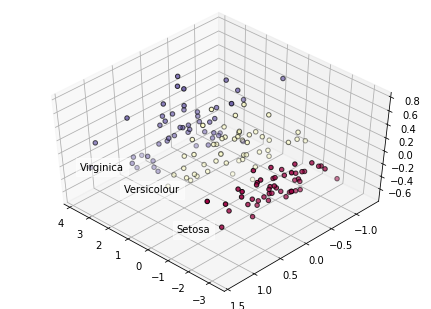

In [39]:
#To transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data
#point with specific class.
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

#dir(load_iris())
iris = load_iris()

# Convert sklearn dataset to pandas Dataframe
# np.c_ is the numpy concatenate function which is used to concat iris['data'] and iris['target'] arrays 
# for columns : concat iris['feature_names'] list and string list (in this case one string - target); 
# df1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
x = iris['data']
y = iris['target']

#Reducing the dimensions for 3D
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x = pca.transform(x)

#Clear the Current Picture
plt.clf()

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#Clear the Current Axes
plt.cla()

# Reorder the labels to have colors matching the cluster results
ax.scatter(x[:,0], x[:,1], x[:,2], c=y, cmap=plt.cm.Spectral, edgecolor='k')

#Add label to the categories separated in the figure
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x[y == label, 0].mean(),
              x[y == label, 1].mean() + 1.5,
              x[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()